# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(citipy)


<module 'citipy.citipy' from 'c:\\Users\\rober\\anaconda3\\envs\\RUTDataViz2023\\lib\\site-packages\\citipy\\citipy.py'>


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print (cities)

Number of cities in the list: 624
['bluff', 'lolua', 'gat', 'waipawa', 'iqaluit', 'tasiilaq', 'bredasdorp', 'hobart', 'ouallam', 'elat', 'castro', 'ushuaia', 'avarua', 'morehead', 'pangnirtung', 'east london', 'rikitea', 'hilo', 'nikolskoye', 'vaini', 'fortuna', 'illoqqortoormiut', 'bismarck', 'provideniya', 'maceio', 'mnogovershinnyy', 'ballina', 'ibicui', 'saskylakh', 'atuona', 'albany', 'punta arenas', 'mys shmidta', 'busselton', 'taolanaro', 'meadow lake', 'de aar', 'mangrol', 'longyearbyen', 'yellowknife', 'pevek', 'mergui', 'shetpe', 'esperance', 'mataura', 'pando', 'rio grande', 'nexo', 'kazalinsk', 'jamestown', 'paysandu', 'kilifi', 'saint-francois', 'matara', 'tuktoyaktuk', 'saint george', 'knin', 'minas novas', 'san ignacio', 'sompeta', 'komsomolskiy', 'qaqortoq', 'edea', 'ilulissat', 'wanning', 'chuy', 'liepaja', 'klaksvik', 'fereydunshahr', 'katsuura', 'palabuhanratu', 'tabiauea', 'khatanga', 'bowen', 'kodiak', 'hervey bay', 'barentsburg', 'nizhneyansk', 'viligili', 'port h

---

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | lolua
City not found. Skipping...
Processing Record 3 of Set 1 | gat
Processing Record 4 of Set 1 | waipawa
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | ouallam
Processing Record 10 of Set 1 | elat
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | morehead
Processing Record 15 of Set 1 | pangnirtung
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Process

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
print (city_data)

[{'City': 'bluff', 'Lat': -46.6, 'Lng': 168.3333, 'Max Temp': 13.22, 'Humidity': 78, 'Cloudiness': 23, 'Wind Speed': 4.35, 'Country': 'NZ', 'Date': 1680338839}, {'City': 'gat', 'Lat': 31.61, 'Lng': 34.7642, 'Max Temp': 18.38, 'Humidity': 14, 'Cloudiness': 2, 'Wind Speed': 3.3, 'Country': 'IL', 'Date': 1680338840}, {'City': 'waipawa', 'Lat': -41.4122, 'Lng': 175.5153, 'Max Temp': 15.09, 'Humidity': 89, 'Cloudiness': 100, 'Wind Speed': 3.2, 'Country': 'NZ', 'Date': 1680338840}, {'City': 'iqaluit', 'Lat': 63.7506, 'Lng': -68.5145, 'Max Temp': -12.15, 'Humidity': 85, 'Cloudiness': 100, 'Wind Speed': 2.57, 'Country': 'CA', 'Date': 1680338841}, {'City': 'tasiilaq', 'Lat': 65.6145, 'Lng': -37.6368, 'Max Temp': -3.91, 'Humidity': 76, 'Cloudiness': 100, 'Wind Speed': 2.43, 'Country': 'GL', 'Date': 1680338841}, {'City': 'bredasdorp', 'Lat': -34.5322, 'Lng': 20.0403, 'Max Temp': 22.01, 'Humidity': 57, 'Cloudiness': 4, 'Wind Speed': 5.32, 'Country': 'ZA', 'Date': 1680338841}, {'City': 'hobart', 'L

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()


City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,13.22,78,23,4.35,NZ,1680338839
1,gat,31.6100,34.7642,18.38,14,2,3.30,IL,1680338840
2,waipawa,-41.4122,175.5153,15.09,89,100,3.20,NZ,1680338840
3,iqaluit,63.7506,-68.5145,-12.15,85,100,2.57,CA,1680338841
4,tasiilaq,65.6145,-37.6368,-3.91,76,100,2.43,GL,1680338841
5,bredasdorp,-34.5322,20.0403,22.01,57,4,5.32,ZA,1680338841
6,hobart,-42.8794,147.3294,13.92,66,75,5.14,AU,1680338826
7,ouallam,14.3188,2.0866,32.05,7,12,6.74,NE,1680338842
8,elat,29.5581,34.9482,18.91,32,0,7.20,IL,1680338842
9,castro,-24.7911,-50.0119,15.23,93,0,1.33,BR,1680338842


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,13.22,78,23,4.35,NZ,1680338839
1,gat,31.6100,34.7642,18.38,14,2,3.30,IL,1680338840
2,waipawa,-41.4122,175.5153,15.09,89,100,3.20,NZ,1680338840
3,iqaluit,63.7506,-68.5145,-12.15,85,100,2.57,CA,1680338841
4,tasiilaq,65.6145,-37.6368,-3.91,76,100,2.43,GL,1680338841


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

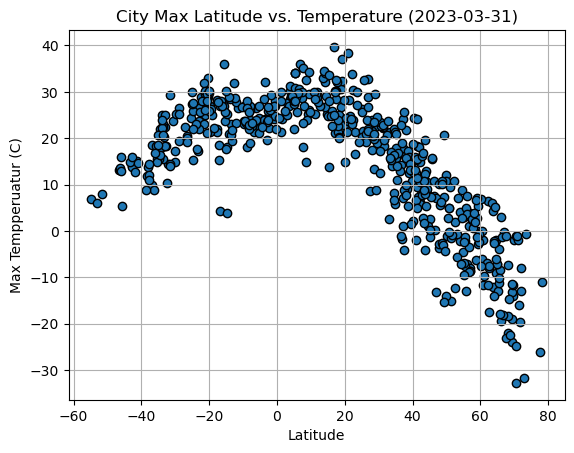

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Max Temp"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempperuatur (C)")
plt.title("City Max Latitude vs. Temperature (2023-03-31)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

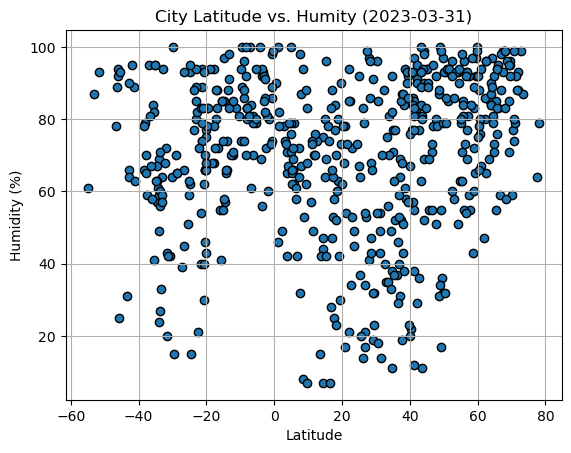

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Humidity"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humity (2023-03-31)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

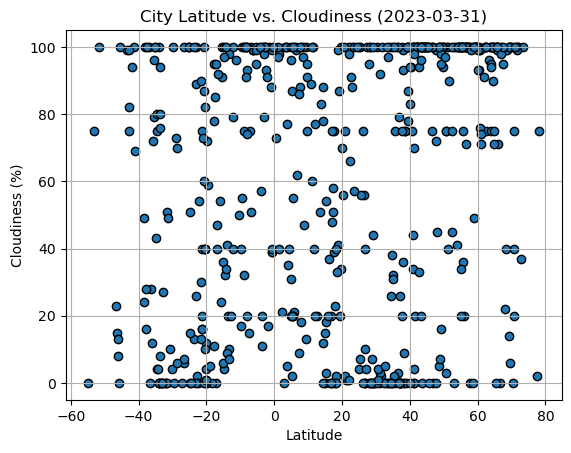

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Cloudiness"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-03-31)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

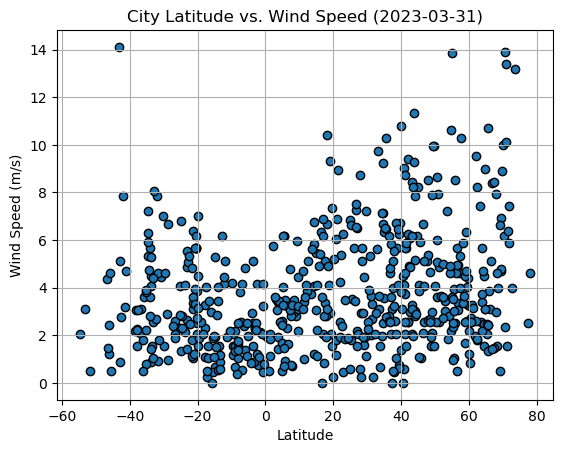

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=city_data_df["Lat"],y=city_data_df["Wind Speed"], marker="o",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-03-31)")
plt.grid(True)
# Save the figu

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, left_annotate, right_annotate,
                      font_size, line_color, x_lable, y_lable):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print (line_eq)

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")

    plt.annotate(line_eq,(left_annotate,right_annotate),fontsize=font_size,color=line_color)
    # Label plot
    plt.xlabel(x_lable)

    plt.ylabel(y_lable)
    plt.grid(True)
    # Print r square value
    print(f"R squared: {rvalue**2}")
    # Show plot
    plt.show()



In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gat,31.6100,34.7642,18.38,14,2,3.30,IL,1680338840
3,iqaluit,63.7506,-68.5145,-12.15,85,100,2.57,CA,1680338841
4,tasiilaq,65.6145,-37.6368,-3.91,76,100,2.43,GL,1680338841
7,ouallam,14.3188,2.0866,32.05,7,12,6.74,NE,1680338842
8,elat,29.5581,34.9482,18.91,32,0,7.20,IL,1680338842


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,13.22,78,23,4.35,NZ,1680338839
2,waipawa,-41.4122,175.5153,15.09,89,100,3.20,NZ,1680338840
5,bredasdorp,-34.5322,20.0403,22.01,57,4,5.32,ZA,1680338841
6,hobart,-42.8794,147.3294,13.92,66,75,5.14,AU,1680338826
9,castro,-24.7911,-50.0119,15.23,93,0,1.33,BR,1680338842


###  Temperature vs. Latitude Linear Regression Plot

y = -0.67x + 36.76
R squared: 0.7850732801906137


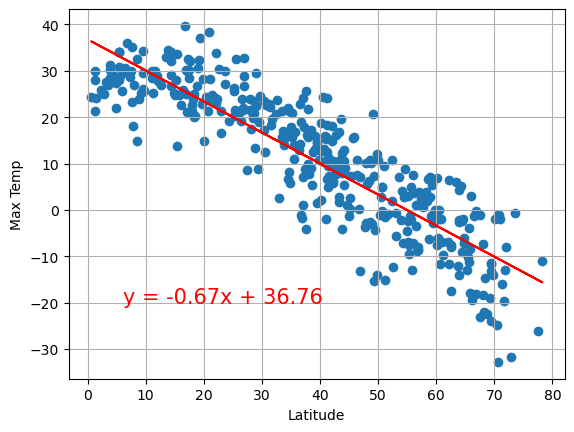

In [16]:
# Linear regression on Northern Hemisphere
# Run linear regression
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],6,-20,
                      15, "red","Latitude","Max Temp")
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Max Temp"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print (line_eq)
# # Plot scatter plot
# plt.scatter(x_values,y_values)
# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# # Print r square value
# print(f"R squared: {rvalue**2}")
# # Show plot
# plt.show()


y = 0.29x + 28.31
R squared: 0.35723944763392657


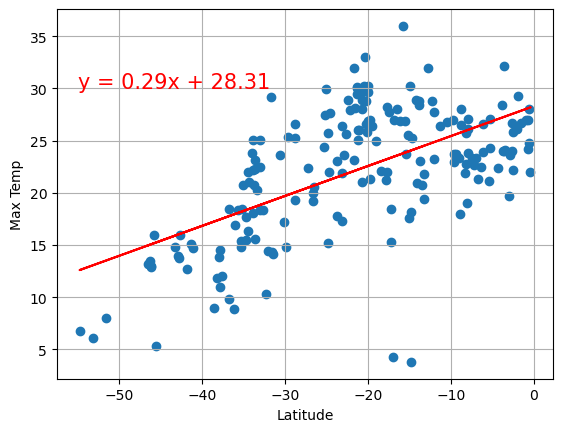

In [17]:
# Linear regression on Southern Hemisphere

# Run linear regression
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],-55,30,
                      15, "red","Latitude","Max Temp")
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Max Temp"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print (line_eq)
# # Plot scatter plot
# plt.scatter(x_values,y_values)
# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(-55,28),fontsize=15,color="red")
# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# # Print r square value
# print(f"R squared: {rvalue**2}")
# # Show plot
# plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.38x + 54.61
R squared: 0.11057243603046323


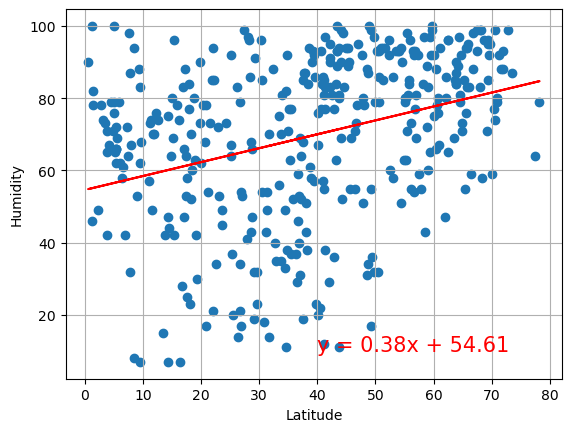

In [18]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 40,10,
                      15, "red", 'Latitude', 'Humidity')
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Humidity"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print (line_eq)
# # Plot scatter plot
# plt.scatter(x_values,y_values)
# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(40,10),fontsize=15,color="red")
# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# # Print r square value
# print(f"R squared: {rvalue**2}")
# # Show plot
# plt.show()

y = 0.42x + 81.81
R squared: 0.08123488267686649


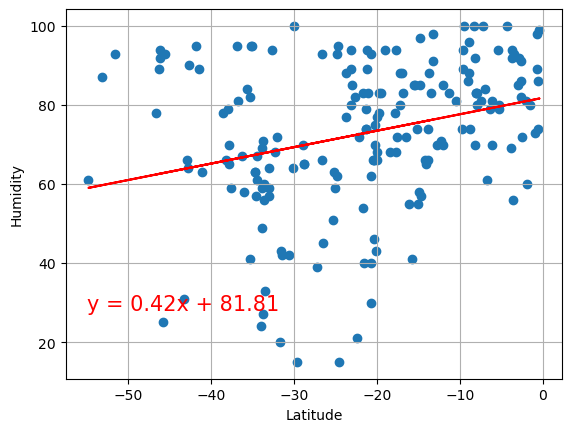

In [19]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],-55,28,
                      15, "red", 'Latitude', 'Humidity')
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Humidity"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print (line_eq)
# # Plot scatter plot
# plt.scatter(x_values,y_values)
# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(-55,28),fontsize=15,color="red")
# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# # Print r square value
# print(f"R squared: {rvalue**2}")
# # Show plot
# plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.56x + 42.84
R squared: 0.07580935789481501


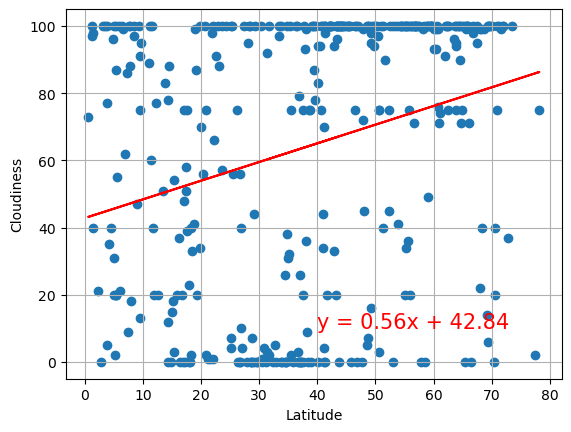

In [20]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],40,10,15,"red","Latitude","Cloudiness")
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Cloudiness"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print (line_eq)
# # Plot scatter plot
# plt.scatter(x_values,y_values)
# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(40,10),fontsize=15,color="red")
# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# # Print r square value
# print(f"R squared: {rvalue**2}")
# # Show plot
# plt.show()

y = 0.69x + 67.77
R squared: 0.0509449973784742


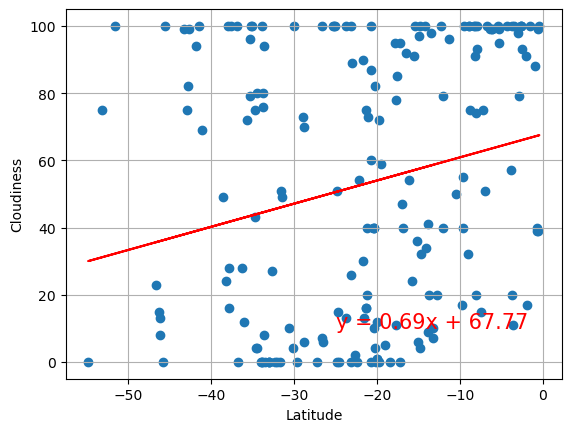

In [21]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],-25,10,15,"red","Latitude","Cloudiness")

# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Cloudiness"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print (line_eq)
# # Plot scatter plot
# plt.scatter(x_values,y_values)
# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(-55,28),fontsize=15,color="red")
# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# # Print r square value
# print(f"R squared: {rvalue**2}")
# # Show plot
# plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.03x + 3.16
R squared: 0.03911927600922902


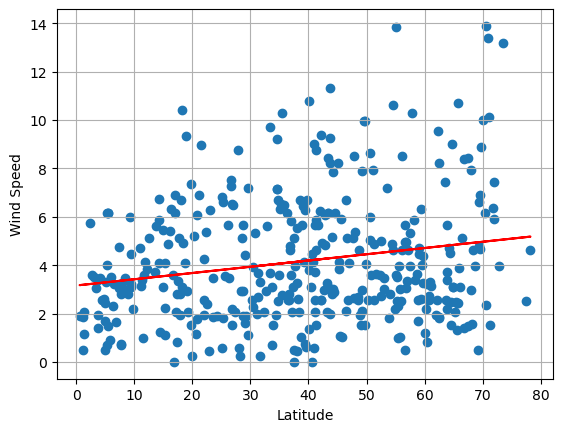

In [22]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],5,15,15,"red","Latitude","Wind Speed")
# x_values = 
# y_values = northern_hemi_df["Wind Speed"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print (line_eq)
# # Plot scatter plot
# plt.scatter(x_values,y_values)
# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(40,10),fontsize=15,color="red")
# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed')
# # Print r square value
# print(f"R squared: {rvalue**2}")
# # Show plot
# plt.show()

y = -0.04x + 2.08
R squared: 0.06487758995449001


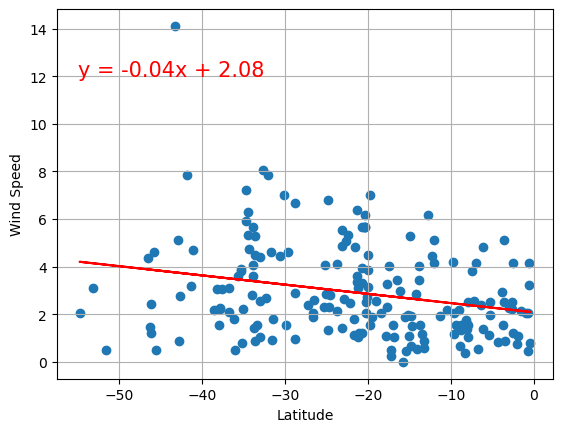

In [23]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-55,12,15,"red","Latitude","Wind Speed")
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Wind Speed"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print (line_eq)
# # Plot scatter plot
# plt.scatter(x_values,y_values)
# # Plot regression line
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
# # Label plot
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed')
# # Print r square value
# print(f"R squared: {rvalue**2}")
# # Show plot
# plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE